In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\VIPLAB\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\VIPLAB\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install retinaface

  Using cached retinaface-1.1.1-py3-none-any.whl (5.9 MB)
INFO: pip is looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.
  Using cached retinaface-1.1.0-py3-none-any.whl (5.9 MB)
  Using cached retinaface-0.0.6-py3-none-any.whl (5.9 MB)
  Using cached retinaface-0.0.5-py3-none-any.whl (5.9 MB)
  Using cached retinaface-0.0.4-py3-none-any.whl (5.9 MB)
  Using cached retinaface-0.0.3-py3-none-any.whl (5.9 MB)
  Using cached retinaface-0.0.2-py3-none-any.whl (7.5 kB)
  Using cached retinaface-0.0.1-py3-none-any.whl (7.5 kB)
INFO: pip is still looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    retinaface 1.1.1 depends on tensorflow==2.5.0
    retinaface 1.1.0 depends on tensorflow==2.5.0
    retinaface 0.0.6 depends on tensorflow==2.1.0
    retinaface 0.0.5 depends on tensorflow==2.1.0
    reti

ERROR: Cannot install retinaface==0.0.1, retinaface==0.0.2, retinaface==0.0.3, retinaface==0.0.4, retinaface==0.0.5, retinaface==0.0.6, retinaface==1.1.0 and retinaface==1.1.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\VIPLAB\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\VIPLAB\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


1/1 [==============================] - 0s 61ms/step


(-0.5, 224.5, 224.5, -0.5)

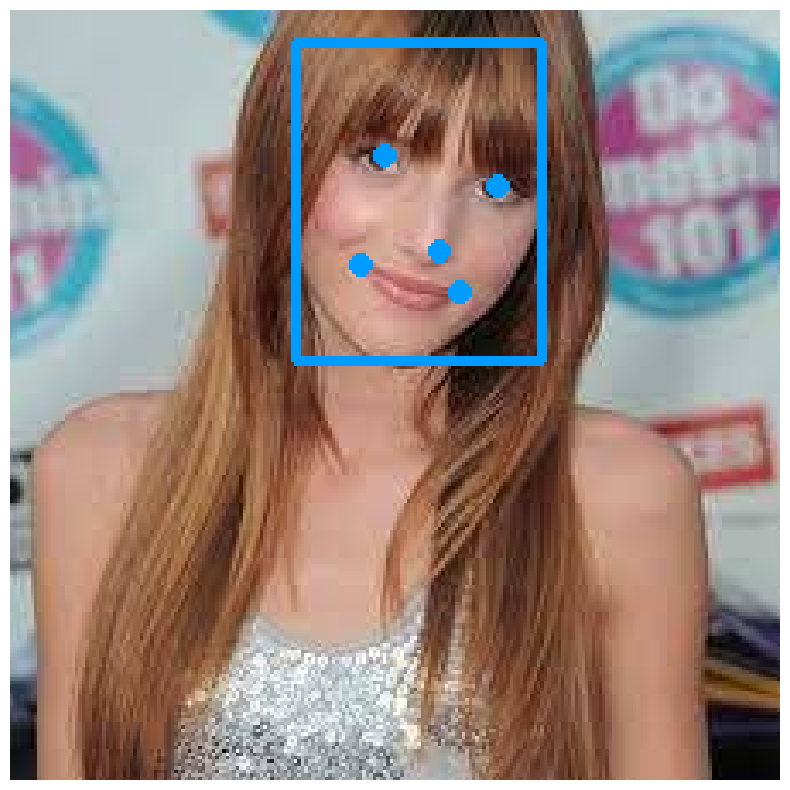

In [7]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import imageio

INPUT_IMAGE = 'database/CeCe Jones/1.jpg'
OUTPUT_IMAGE = '10-alignment.png'
detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])

img = cv2.cvtColor(cv2.imread(INPUT_IMAGE), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)

#img_with_dets = cv2.imread("50.png")
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')

In [8]:
#face alignment
def landmarks(img):
    faces = detector.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    face = max(faces, key=lambda x: x['confidence'])
    return face['keypoints']

def affineMatrix(lmks, scale=4):
    nose = np.array(lmks['nose'], dtype=np.float32)
    left_eye = np.array(lmks['left_eye'], dtype=np.float32)
    right_eye = np.array(lmks['right_eye'], dtype=np.float32)
    eye_width = right_eye - left_eye
    angle = np.arctan2(eye_width[1], eye_width[0])
    center = nose
    alpha = np.cos(angle)
    beta = np.sin(angle)
    w = np.sqrt(np.sum(eye_width**2)) * scale
    m = [[alpha, beta, -alpha * center[0] - beta * center[1] + w * 0.4],
        [-beta, alpha, beta * center[0] - alpha * center[1] + w * 0.4]]
    return np.array(m), (int(w), int(w))

if __name__ == '__main__':
    img = cv2.imread(INPUT_IMAGE)
    mat, size = affineMatrix(landmarks(img))
    aligned = cv2.warpAffine(img, mat, (112,112))
    cv2.imwrite(OUTPUT_IMAGE, aligned)

1/1 [==============================] - 0s 12ms/step


In [9]:
import onnx

model = onnx.load("model/arcfaceresnet100-8.onnx")

for node in model.graph.node:
    if (node.op_type == "BatchNormalization"):
        for attr in node.attribute:
            if (attr.name == "spatial"):
                attr.i = 1

onnx.save(model, "model/arcfaceresnet100.onnx")

In [10]:
#提取aligned後的臉部特徵
import numpy as np
import onnxruntime as rt
from sklearn.preprocessing import normalize

onnx_path = "model/arcfaceresnet100.onnx"
extractor = rt.InferenceSession(onnx_path)

t_aligned = np.transpose(aligned, (2, 0, 1))
inputs = t_aligned.astype(np.float32)
input_blob = np.expand_dims(inputs, axis=0)

first_input_name = extractor.get_inputs()[0].name
first_output_name = extractor.get_outputs()[0].name

predict = extractor.run([first_output_name], {first_input_name: input_blob})[0]
final_embedding = normalize(predict).flatten()

In [12]:
import os
import cv2
import numpy as np
from skimage import transform as trans
import onnxruntime as rt
from mtcnn.mtcnn import MTCNN
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import sqlite3
import io

def face_detect(img_path):
    img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    detections = detector.detect_faces(img_rgb)

    return img_rgb, detections

def face_align(img_rgb, landmarks):
    src = np.array([
        [30.2946, 51.6963],
        [65.5318, 51.5014],
        [48.0252, 71.7366],
        [33.5493, 92.3655],
        [62.7299, 92.2041] ], dtype=np.float32)
    dst = np.array(landmarks, dtype=np.float32).reshape(5, 2)
    tform = trans.SimilarityTransform()
    tform.estimate(dst, src)
    M = tform.params[0:2,:]
    aligned = cv2.warpAffine(img_rgb, M, (112, 112), borderValue = 0)

    return aligned

def get_embeddings(img_rgb, detections):
    position = []
    landmarks = []
    embeddings = np.zeros((len(detections), 512))
    for i, face_info in enumerate(detections):
        face_position = [face_info['x1'], face_info['y1'], face_info['x2'], face_info['y2']]
        face_landmarks = [face_info['left_eye'], face_info['right_eye'], face_info['nose'], face_info['left_lip'],
                     face_info['right_lip']]

        position.append(face_position)
        landmarks.append(face_landmarks)

        aligned = face_align(img_rgb, face_landmarks)
        t_aligned = np.transpose(aligned, (2, 0, 1))

        inputs = t_aligned.astype(np.float32)
        input_blob = np.expand_dims(inputs, axis=0)

        first_input_name = extractor.get_inputs()[0].name
        first_output_name = extractor.get_outputs()[0].name

        predict = extractor.run([first_output_name], {first_input_name: input_blob})[0]
        final_embedding = normalize(predict).flatten()

        embeddings[i] = final_embedding

    return position, landmarks, embeddings

def adapt_array(arr):
   out = io.BytesIO()
   np.save(out, arr)
   out.seek(0)
   return sqlite3.Binary(out.read())

def convert_array(text):
   out = io.BytesIO(text)
   out.seek(0)
   return np.load(out)

def load_file(file_path):
    file_data = {}
    for person_name in os.listdir(file_path):
        person_file = os.path.join(file_path, person_name)

        total_pictures = []
        for picture in os.listdir(person_file):
            picture_path = os.path.join(person_file, picture)
            total_pictures.append(picture_path)

        file_data[person_name] = total_pictures

    return file_data

def create_db(db_path, file_path):
    if os.path.exists(file_path):
        conn_db = sqlite3.connect(db_path)
        conn_db.execute("CREATE TABLE face_info \
                         (id INT PRIMARY KEY NOT NULL, \
                         name TEXT NOT NULL, \
                         embedding ARRAY NOT NULL)")

        file_data = load_file(file_path)
        for i, person_name in enumerate(file_data.keys()):
            picture_path = file_data[person_name]
            sum_embeddings = np.zeros([1, 512])
            for j, picture in enumerate(picture_path):
                img_rgb, detections = face_detect(picture)
                position, landmarks, embeddings = get_embeddings(img_rgb, detections)
                sum_embeddings += embeddings

            final_embedding = sum_embeddings / len(picture_path)
            adapt_embedding = adapt_array(final_embedding)

            conn_db.execute("INSERT INTO face_info (id, name, embedding) VALUES (?, ?, ?)",(i, person_name, adapt_embedding))
        conn_db.commit()
        conn_db.close()

    else:
        print("database file does not exist")

def compare_face(embeddings, threshold):
    conn_db = sqlite3.connect(db_path)
    cursor = conn_db.execute("SELECT * FROM face_info")
    db_data = cursor.fetchall()

    total_distances = []
    total_names = []
    for data in db_data:
        total_names.append(data[1])
        db_embeddings = convert_array(data[2])
        distance = round(np.linalg.norm(db_embeddings - embeddings), 2)
        total_distances.append(distance)
    total_result = dict(zip(total_names, total_distances))
    idx_min = np.argmin(total_distances)

    distance, name = total_distances[idx_min], total_names[idx_min]
    conn_db.close()

    if distance < threshold:
        return name, distance, total_result
    else:
        name = "Unknown Person"
        return name, distance, total_result

img_path = 'database/CeCe Jones/1.jpg'
detector = MTCNN()
onnx_path = "model/arcfaceresnet100.onnx"
extractor = rt.InferenceSession(onnx_path)
file_path = 'database'
db_path = 'database.db'
threshold = 1
sqlite3.register_adapter(np.ndarray, adapt_array)
sqlite3.register_converter("ARRAY", convert_array)

if not os.path.exists(db_path):
    create_db(db_path, file_path)

img_rgb, detections = face_detect(img_path)
position, landmarks, embeddings = get_embeddings(img_rgb, detections)

for i, embedding in enumerate(embeddings):
    name, distance, total_result = compare_face(embedding, threshold)
    print("total_result:", total_result)

    cv2.rectangle(img_rgb, (position[i][0], position[i][1]), (position[i][2], position[i][3]), (255, 0, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_rgb, name + ', ' + str(distance), (position[i][0] + 10, position[i][1] - 10), font, 0.8, (255, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb / 255)
_ = plt.axis('off')
plt.show()




1/1 [==============================] - 0s 62ms/step


KeyError: 'x1'